# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab_sex

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [5]:
tab_sex['quant_media_doentes'] = tab_sex[1] / tab_sex['All']
tab_sex

flag_doente,0,1,All,quant_media_doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [6]:
tab_sex['odds'] = tab_sex[0] / tab_sex[1]
tab_sex

flag_doente,0,1,All,quant_media_doentes,odds
sex,,,,,
0.0,72,25,97,0.257732,2.880000
1.0,92,114,206,0.553398,0.807018
All,164,139,303,0.458746,1.179856


In [7]:
tab_sex['RC_vs_all'] = tab_sex['odds'] / tab_sex.loc['All', 'odds']
tab_sex

flag_doente,0,1,All,quant_media_doentes,odds,RC_vs_all
sex,,,,,,
0.0,72,25,97,0.257732,2.880000,2.440976
1.0,92,114,206,0.553398,0.807018,0.683997
All,164,139,303,0.458746,1.179856,1.000000


In [8]:
tab_sex['Logito'] = np.log(tab_sex['odds'])
tab_sex

flag_doente,0,1,All,quant_media_doentes,odds,RC_vs_all,Logito
sex,,,,,,,
0.0,72,25,97,0.257732,2.880000,2.440976,1.057790
1.0,92,114,206,0.553398,0.807018,0.683997,-0.214410
All,164,139,303,0.458746,1.179856,1.000000,0.165392


In [9]:
tab_sex['WOE'] = np.log(tab_sex['RC_vs_all'])
tab_sex

flag_doente,0,1,All,quant_media_doentes,odds,RC_vs_all,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,2.880000,2.440976,1.057790,0.892398
1.0,92,114,206,0.553398,0.807018,0.683997,-0.214410,-0.379802
All,164,139,303,0.458746,1.179856,1.000000,0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [10]:
df['age'].min(), df['age'].max()

(29.0, 77.0)

In [11]:
classes = [29, 38, 47, 56, 65, 77]
labels = ['29 a 37', '38 a 46', '47 a 55', '56 a 64', '65 ou +']

idade_cat = pd.cut(x=df['age'], bins=classes, labels=labels)

In [12]:
df['idade_cat'] = idade_cat
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,idade_cat
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,56 a 64
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,65 ou +
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,65 ou +
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29 a 37
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,38 a 46


In [13]:
tab_age = pd.crosstab(df['idade_cat'], df['flag_doente'], margins=True)
tab_age

flag_doente,0,1,All
idade_cat,,,
29 a 37,7,3,10
38 a 46,46,18,64
47 a 55,53,34,87
56 a 64,40,68,108
65 ou +,17,16,33
All,163,139,302


In [14]:
tab_age['quant_media_doentes'] = tab_age[1] / tab_age['All']
tab_age

flag_doente,0,1,All,quant_media_doentes
idade_cat,,,,
29 a 37,7,3,10,0.300000
38 a 46,46,18,64,0.281250
47 a 55,53,34,87,0.390805
56 a 64,40,68,108,0.629630
65 ou +,17,16,33,0.484848
All,163,139,302,0.460265


In [15]:
tab_age['odds'] = tab_age[0] / tab_age[1]
tab_age

flag_doente,0,1,All,quant_media_doentes,odds
idade_cat,,,,,
29 a 37,7,3,10,0.300000,2.333333
38 a 46,46,18,64,0.281250,2.555556
47 a 55,53,34,87,0.390805,1.558824
56 a 64,40,68,108,0.629630,0.588235
65 ou +,17,16,33,0.484848,1.062500
All,163,139,302,0.460265,1.172662


In [16]:
tab_age['RC_vs_all'] = tab_age['odds'] / tab_age.loc['All', 'odds']
tab_age

flag_doente,0,1,All,quant_media_doentes,odds,RC_vs_all
idade_cat,,,,,,
29 a 37,7,3,10,0.300000,2.333333,1.989775
38 a 46,46,18,64,0.281250,2.555556,2.179277
47 a 55,53,34,87,0.390805,1.558824,1.329304
56 a 64,40,68,108,0.629630,0.588235,0.501624
65 ou +,17,16,33,0.484848,1.062500,0.906058
All,163,139,302,0.460265,1.172662,1.000000


In [17]:
tab_age['Logito'] = np.log(tab_age['odds'])
tab_age

flag_doente,0,1,All,quant_media_doentes,odds,RC_vs_all,Logito
idade_cat,,,,,,,
29 a 37,7,3,10,0.300000,2.333333,1.989775,0.847298
38 a 46,46,18,64,0.281250,2.555556,2.179277,0.938270
47 a 55,53,34,87,0.390805,1.558824,1.329304,0.443931
56 a 64,40,68,108,0.629630,0.588235,0.501624,-0.530628
65 ou +,17,16,33,0.484848,1.062500,0.906058,0.060625
All,163,139,302,0.460265,1.172662,1.000000,0.159276


In [18]:
tab_age['WOE'] = np.log(tab_age['RC_vs_all'])
tab_age

flag_doente,0,1,All,quant_media_doentes,odds,RC_vs_all,Logito,WOE
idade_cat,,,,,,,,
29 a 37,7,3,10,0.300000,2.333333,1.989775,0.847298,0.688022
38 a 46,46,18,64,0.281250,2.555556,2.179277,0.938270,0.778993
47 a 55,53,34,87,0.390805,1.558824,1.329304,0.443931,0.284655
56 a 64,40,68,108,0.629630,0.588235,0.501624,-0.530628,-0.689905
65 ou +,17,16,33,0.484848,1.062500,0.906058,0.060625,-0.098652
All,163,139,302,0.460265,1.172662,1.000000,0.159276,0.000000


In [19]:
media_idade = df['age'].mean()
media_idade

54.43894389438944

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

C:\Users\Caio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Caio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Caio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Caio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


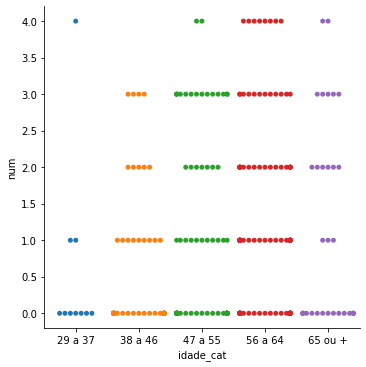

In [26]:
sns.catplot(x='idade_cat', y='num', kind='swarm' ,data=df)

<AxesSubplot:xlabel='idade_cat', ylabel='flag_doente'>

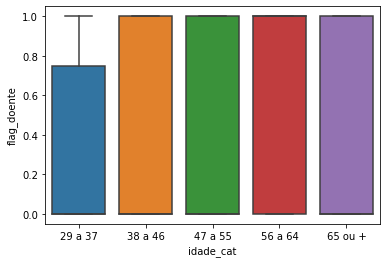

In [28]:
sns.boxplot(x='idade_cat', y='flag_doente', data=df)

<AxesSubplot:xlabel='idade_cat', ylabel='num'>

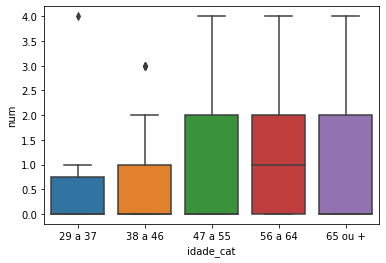

In [29]:
sns.boxplot(x='idade_cat', y='num', data=df)